In [1]:
DEBUG = False
CONFIG_FILE = '/datascope/subaru/data/targeting/MW/outerdisk_l180_b22_ENG/netflow/outerdisk_l180_b22_bright_002/ga-netflow_20250121223403.config'
OUTPUT_PATH = '/datascope/subaru/data/targeting/MW/outerdisk_l180_b22_ENG/netflow/outerdisk_l180_b22_bright_002'

# Plot the target lists

Load the target lists and plot them.

In [2]:
import os, sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rc('font', size=6) #controls default text size

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
if DEBUG and 'debug' not in globals():
    import debugpy
    debugpy.listen(('0.0.0.0', int(os.environ['PFS_TARGETING_DEBUGPORT'])))
    debug = True

# Imports

In [6]:
import pfs.utils

from pfs.ga.targeting.scripts.netflow.notebooks.notebooks import *
from pfs.ga.targeting.instrument import *


# Load the netflow config file

In [7]:
# Load the configuration
config = load_netflow_config(CONFIG_FILE)

2025-01-21T17:57:42.346 30 cobraCoach setting invisible cobras: [173, 648, 799, 853, 949, 1173, 1653, 1724, 2182]
2025-01-21T17:57:42.441 30 cobraCoach setting bad cobras: [47, 50, 173, 193, 344, 347, 361, 443, 493, 648, 738, 754, 799, 821, 853, 949, 1150, 1173, 1208, 1210, 1303, 1460, 1494, 1520, 1539, 1580, 1637, 1653, 1724, 1790, 1791, 1792, 1825, 1836, 1882, 1903, 2053, 2182, 2352, 2380]
2025-01-21T17:57:42.460 20 cobraCoach cc connecting to fpga....
2025-01-21T17:57:42.464 30 butler     newRun: /tmp/cobra_coach/20250121_075


# Load the target lists

In [8]:
print_target_list_config(config)

gaia sci $PFS_TARGETING_DATA/data/targeting/MW/outerdisk_l180_b22_ENG/ga_targets_outerdisk_l180_b22_ENG_bright-v2.csv
ps1 sci $PFS_TARGETING_DATA/data/targeting/MW/outerdisk_l180_b22_ENG/ga_targets_outerdisk_l180_b22_ENG_bright-v2.csv
sky sky $PFS_TARGETING_DATA/data/targeting/MW/outerdisk_l180_b22_ENG/outerdisk_b22_sky.feather
fluxstd cal $PFS_TARGETING_DATA/data/targeting/MW/outerdisk_l180_b22_ENG/outerdisk_b22_fluxstd.feather


In [9]:
target_lists = load_target_lists(config, OUTPUT_PATH)
len(target_lists)

2025-01-21T17:57:47.641 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `g`.


4

In [10]:
# List available photometry for each target list
print_photometry(target_lists)

gaia
  gaia
     g
ps1
  ps1
     g
sky
fluxstd
  ps1
     g
     r
     i
     z
     y


# Plot target lists

In [11]:
if config.field.center is not None:
    center = config.field.center.get_pointing()
else:
    center = config.pointings[0].get_pointing()

if config.pointings is not None:
    pointings = [ p.get_pointing() for p in config.pointings ]
else:
    pointings = None

In [12]:
# Create the PFI instrument. This will load the instrument calibration data.
pfi = SubaruPFI(instrument_options=config.instrument_options)

2025-01-21T17:57:55.280 30 cobraCoach setting invisible cobras: [173, 648, 799, 853, 949, 1173, 1653, 1724, 2182]
2025-01-21T17:57:55.366 30 cobraCoach setting bad cobras: [47, 50, 173, 193, 344, 347, 361, 443, 493, 648, 738, 754, 799, 821, 853, 949, 1150, 1173, 1208, 1210, 1303, 1460, 1494, 1520, 1539, 1580, 1637, 1653, 1724, 1790, 1791, 1792, 1825, 1836, 1882, 1903, 2053, 2182, 2352, 2380]
2025-01-21T17:57:55.393 20 cobraCoach cc connecting to fpga....
2025-01-21T17:57:55.404 30 butler     newRun: /tmp/cobra_coach/20250121_076


/home/dobos/project/ga_targeting/python/pfs/ga/targeting/diagram/diagram.py:61: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  l = ax.scatter(x[mask][s], y[mask][s], color=color, c=c, s=size, **style)
2025-01-21T17:57:58.760 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `g`.
2025-01-21T17:57:58.762 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `r`.
2025-01-21T17:57:58.765 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `r`.


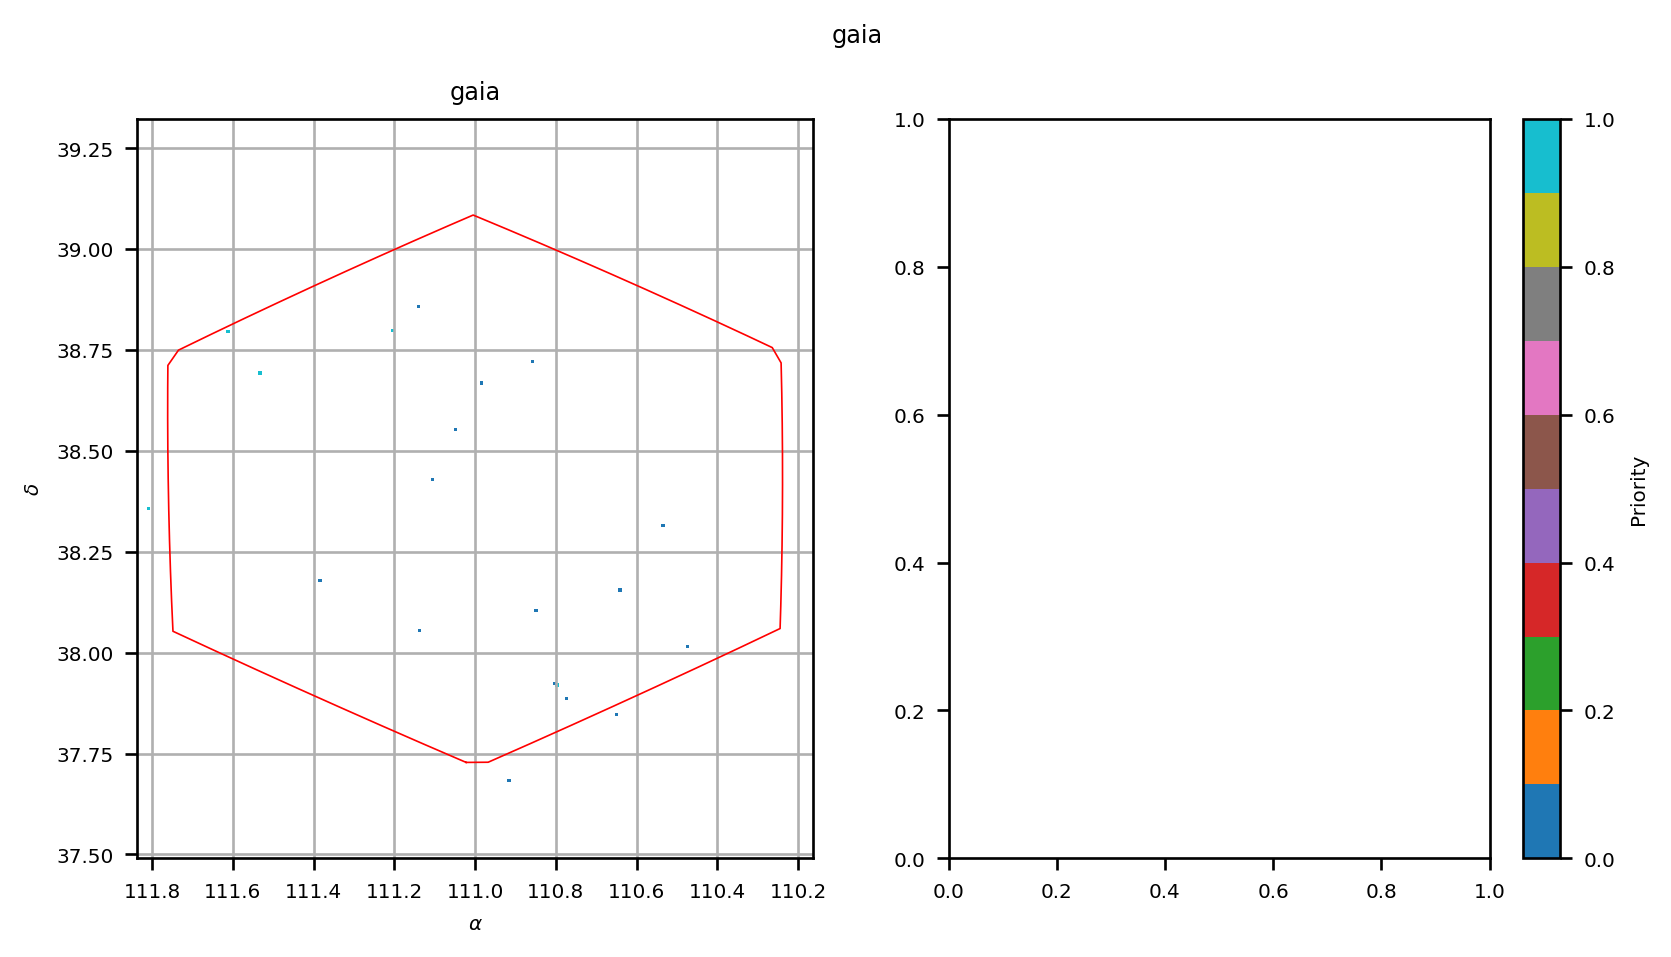

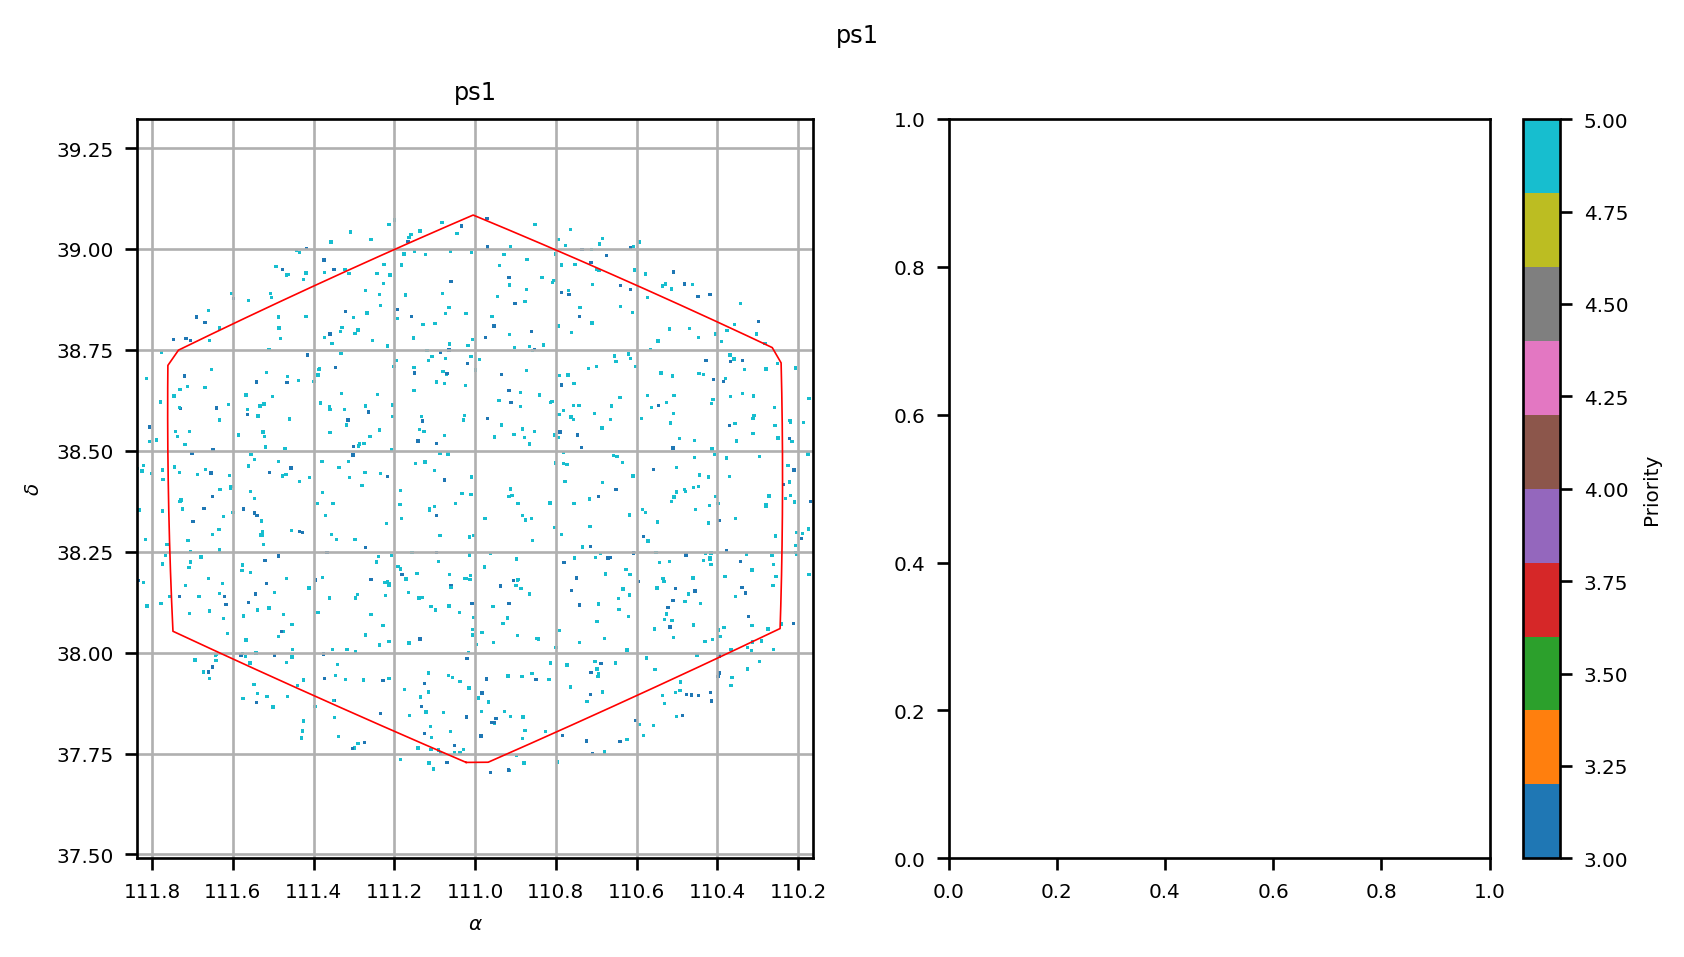

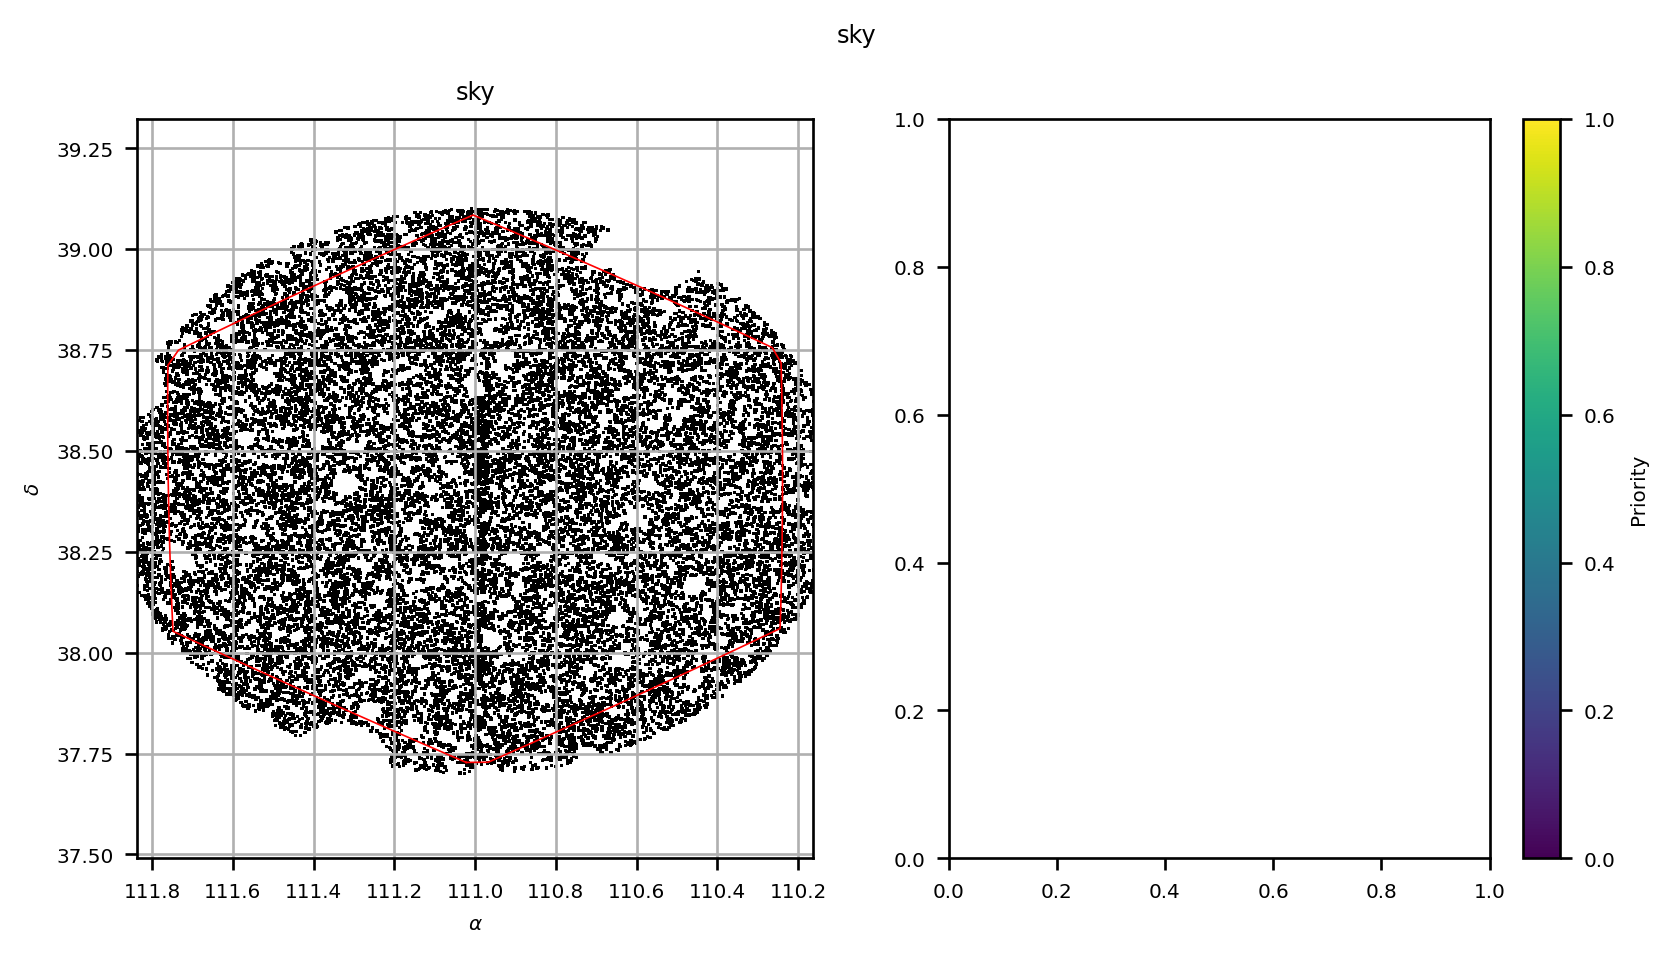

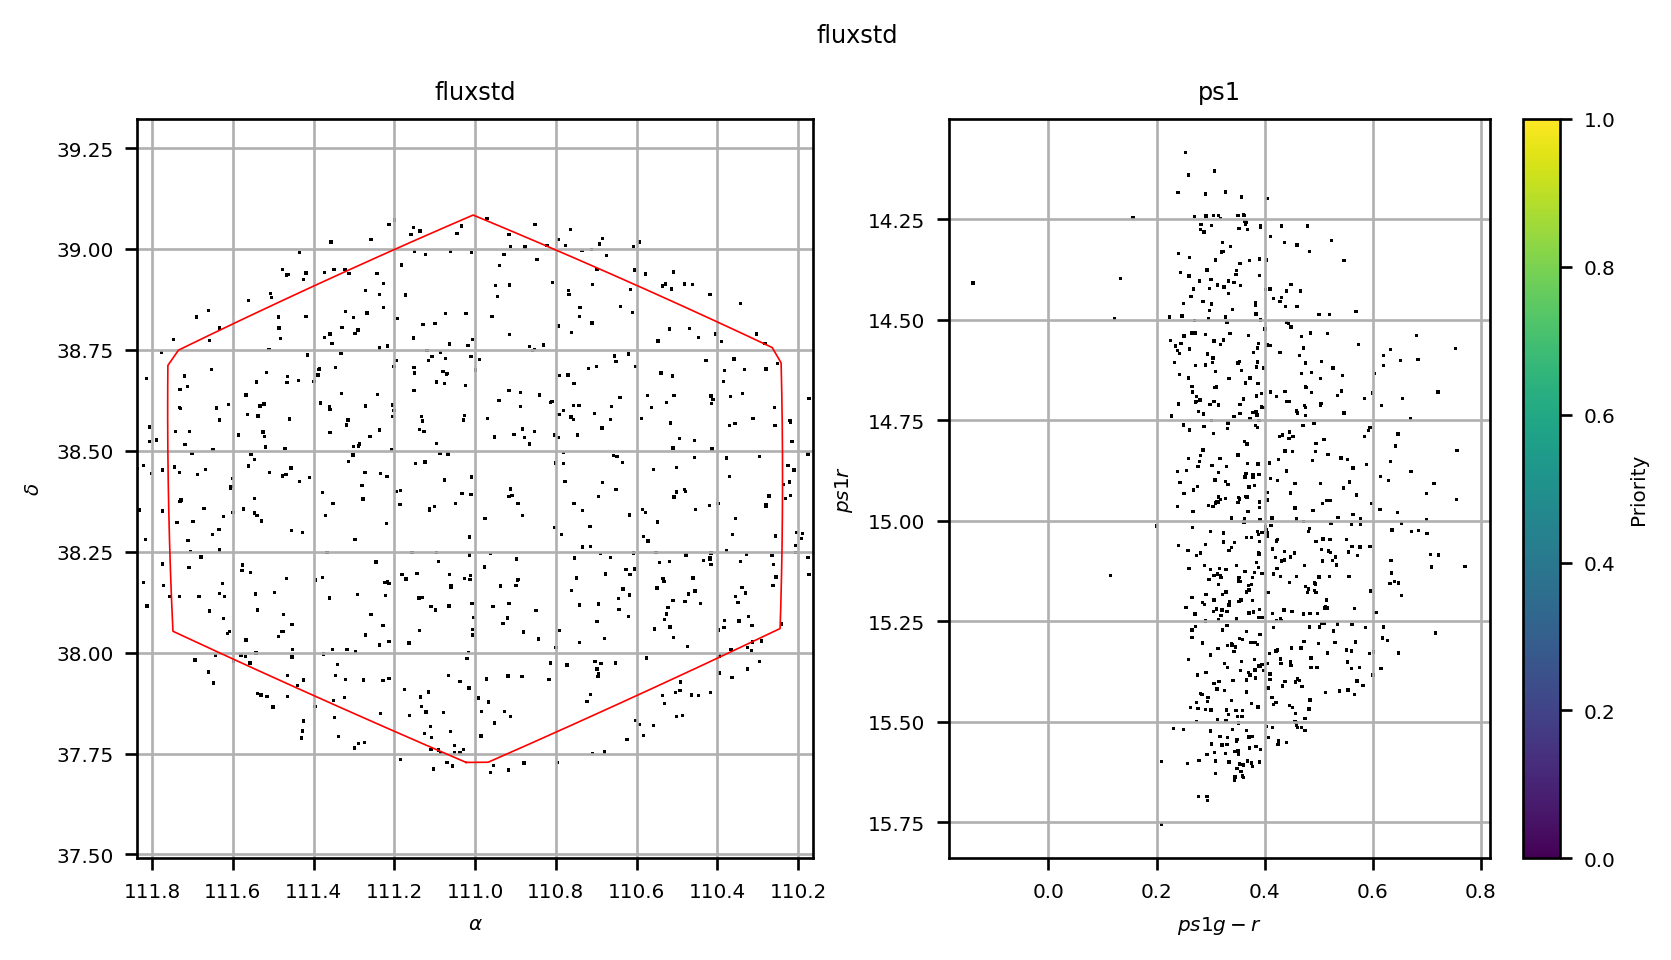

In [13]:
for k in target_lists:
    plot_target_list(target_lists[k], pfi, center, 
                     pointings=pointings)

# Plot magnitude distributions

In [14]:
phot, mags = get_unique_photometry(target_lists)

2025-01-21T17:58:01.790 30 targeting  Extinction correction is not available in catalog `gaia` for magnitude `g`.
2025-01-21T17:58:01.816 30 targeting  Extinction correction is not available in catalog `ps1` for magnitude `g`.
2025-01-21T17:58:01.819 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `g`.
2025-01-21T17:58:01.837 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `i`.
2025-01-21T17:58:01.888 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `r`.
2025-01-21T17:58:01.920 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `y`.
2025-01-21T17:58:01.957 30 targeting  Extinction correction is not available in catalog `fluxstd` for magnitude `z`.


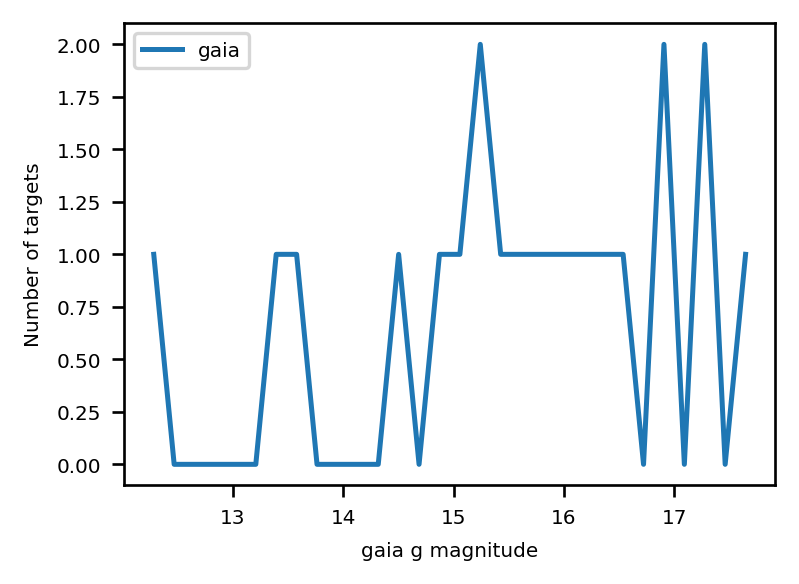

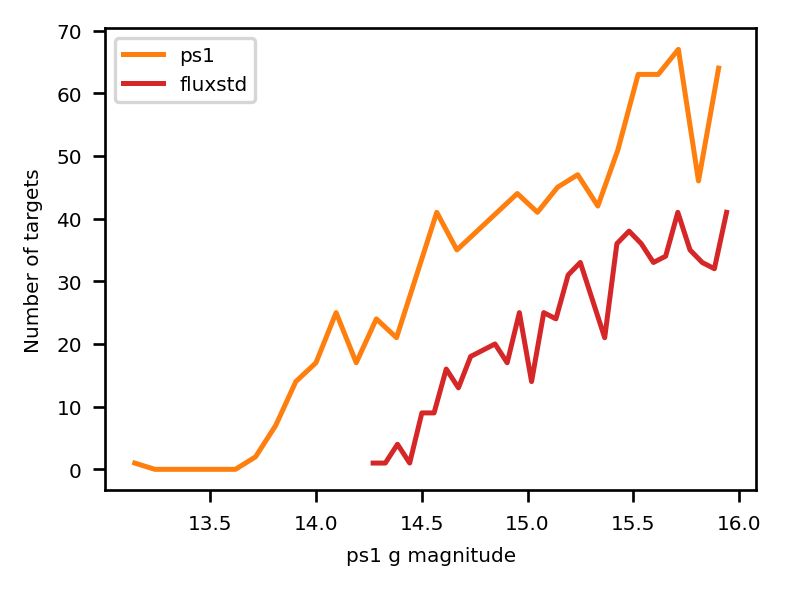

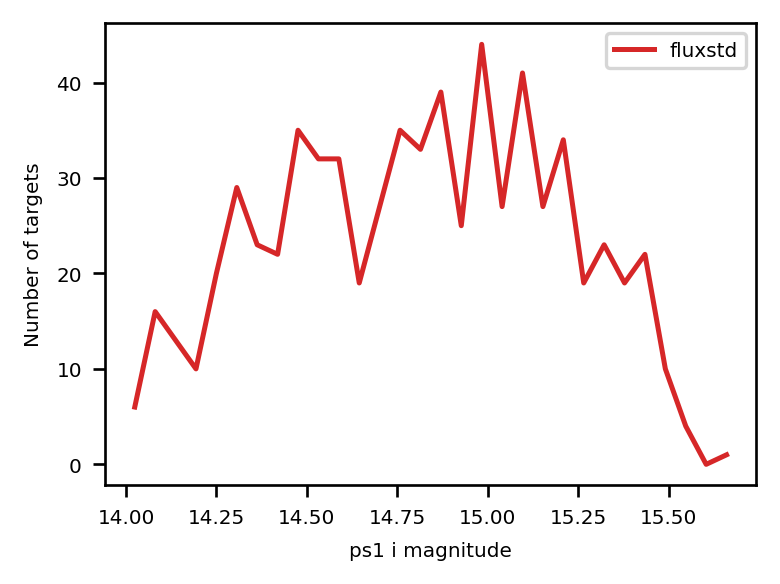

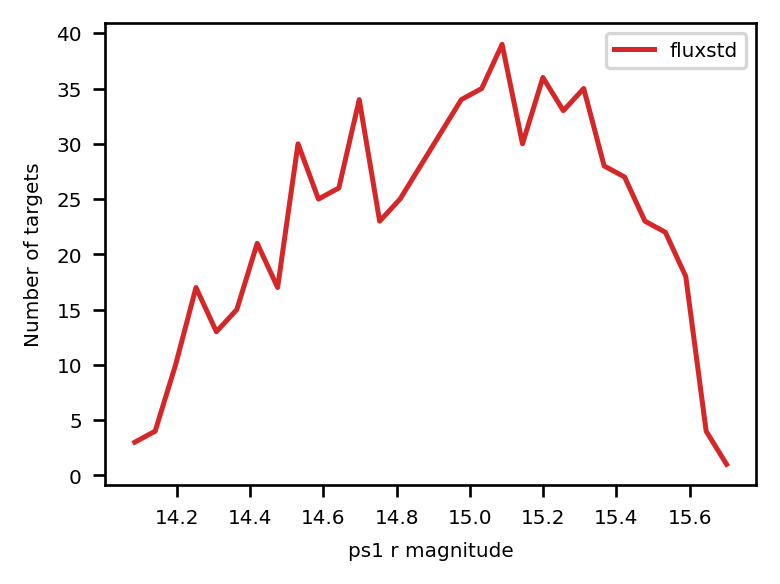

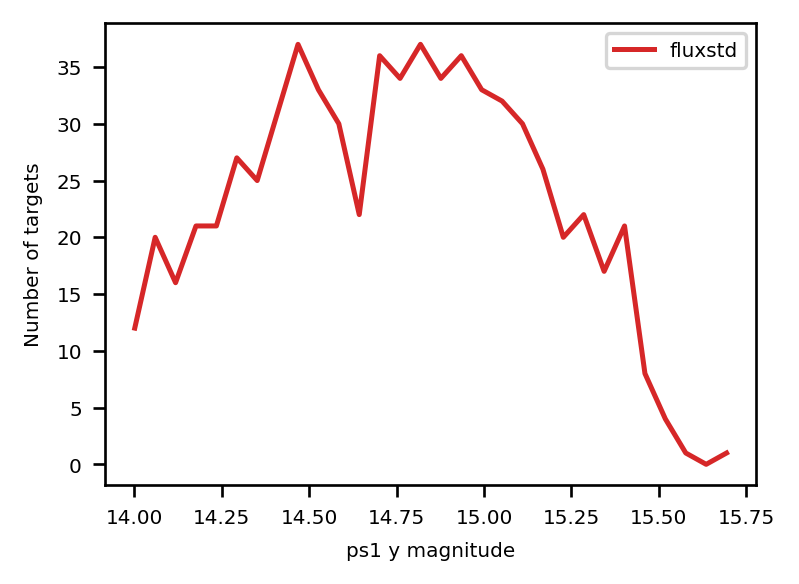

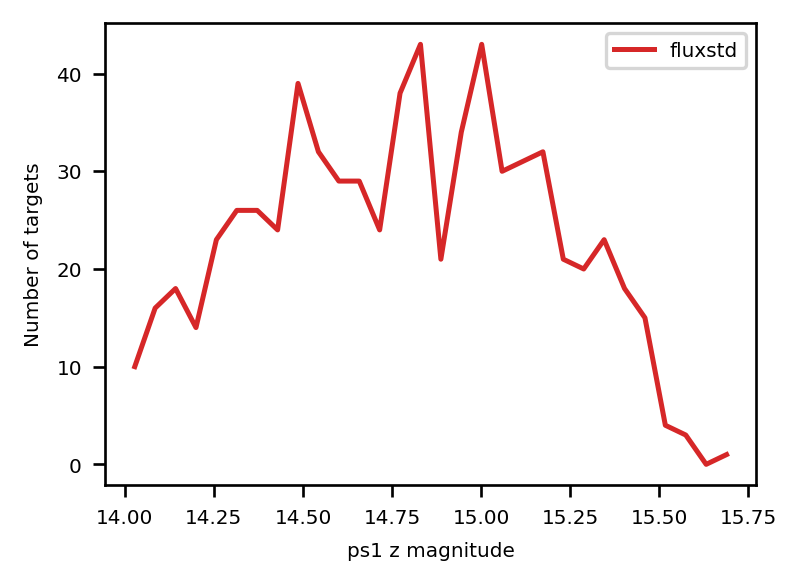

In [15]:
# Plot the magnitude distribution for each target list for each magnitude
plot_magnitude_dist(target_lists, phot, mags)

# Plot parameter distributions

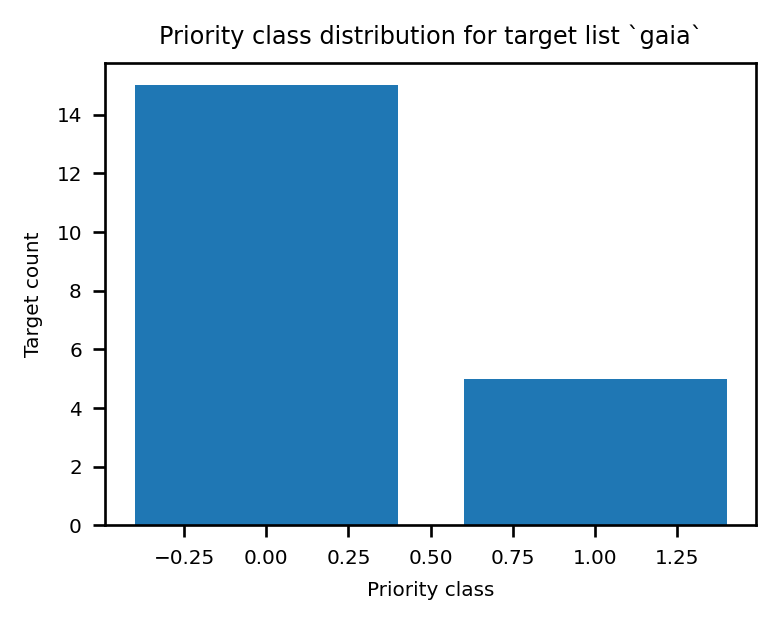

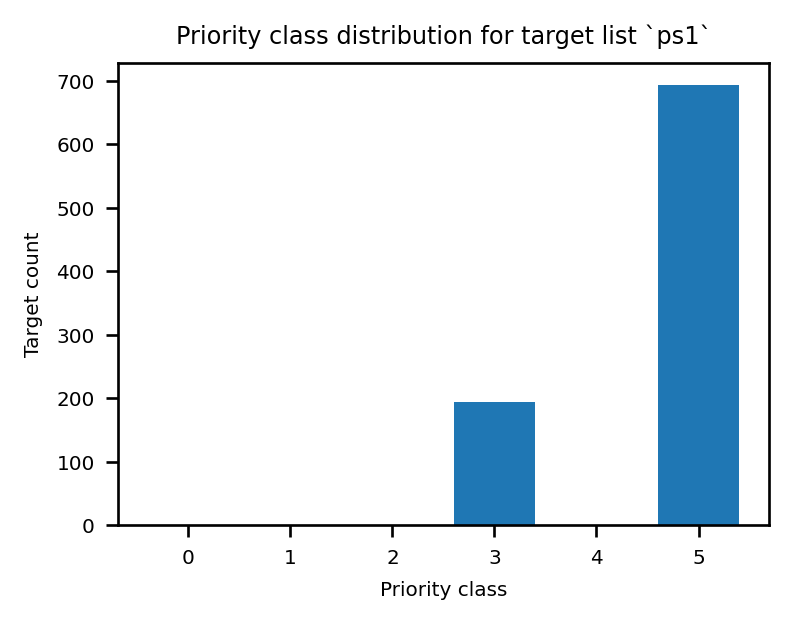

In [16]:
# Plot priority distribution for each target list

for k in config.targets:
    if config.targets[k].prefix in ['sci']:
        plot_priority_dist(target_lists[k])

In [19]:
# We assume that exposure time is the same for all pointings
exp_time = config.pointings[0].exp_time
if exp_time is None:
    exp_time = config.field.exp_time
exp_time

1800

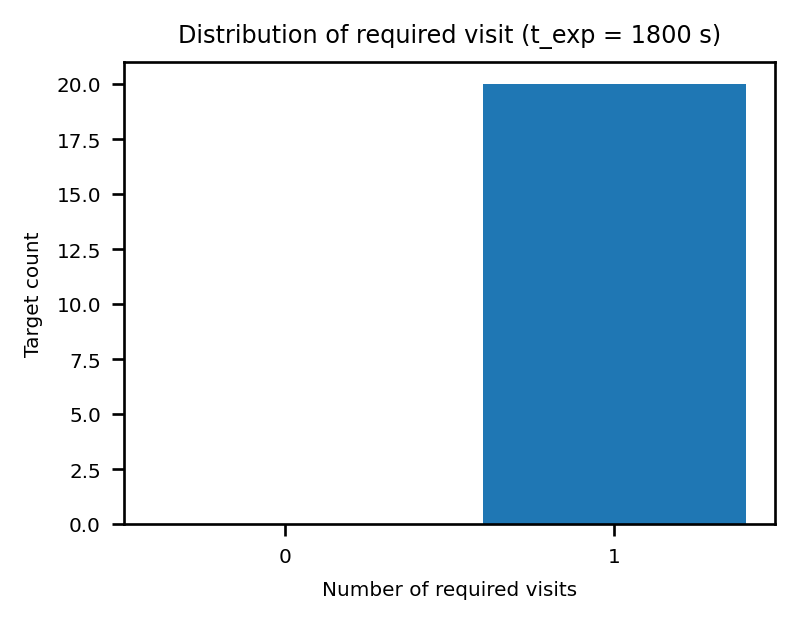

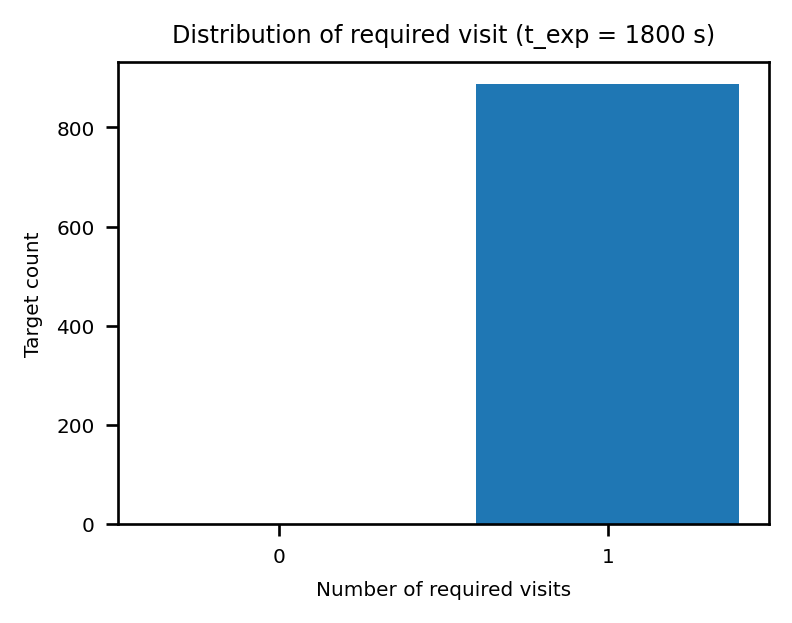

In [24]:
# Plot the distribution of required visits for each target list

for k in config.targets:
    if config.targets[k].prefix in ['sci']:
        plot_required_visits_dist(target_lists[k], exp_time)